In [1]:
!pip install pytrends

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
from pytrends.request import TrendReq

In [173]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.suggestions(keyword='bitcoin')

[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Cryptocurrency'},
 {'mid': '/g/11fzz0b6bd',
  'title': 'The Bitcoin Standard: The Decentralized Alternative to Central Banking',
  'type': 'Book by Saifedean Ammous'},
 {'mid': '/g/11g24jzg8x',
  'title': 'Cryptocurrency Investing For Dummies',
  'type': 'Book by Kiana Danial'},
 {'mid': '/g/11fx8y_lzq',
  'title': 'Mastering Bitcoin: Programming the Open Blockchain',
  'type': 'Book by Andreas Antonopoulos'},
 {'mid': '/g/11h2fx5fh8',
  'title': 'Bitcoin: A Peer-to-Peer Electronic Cash System',
  'type': 'Book by Satoshi Nakamoto'}]

In [174]:
kw_list = ['bitcoin','binance','coinbase']
cat = 0
geo = ''
timeframe = '2020-01-01 2021-10-01'

,bitcoin,binance,coinbase
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
...,...,...,...
Western Sahara,0,0,0
Yemen,0,0,0
Zambia,0,0,0


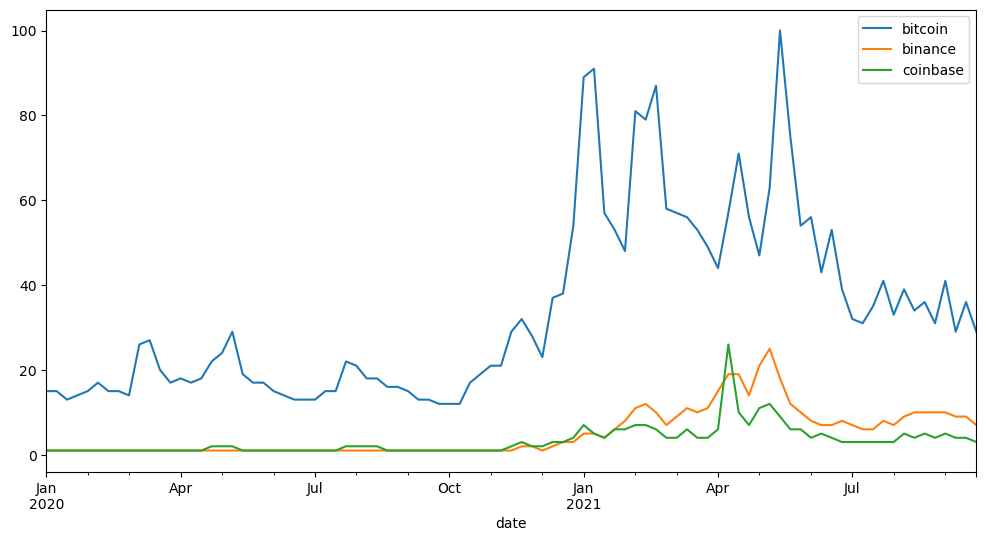

In [175]:
pytrends.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop='')
data = pytrends.interest_over_time()
%matplotlib inline

data.plot(figsize = (12,6))

app = pytrends.interest_by_region(resolution='COUNTRY')
app

In [176]:
data

,bitcoin,binance,coinbase,isPartial
date,,,,
2020-01-05,15,1,1,False
2020-01-12,15,1,1,False
2020-01-19,13,1,1,False
2020-01-26,14,1,1,False
2020-02-02,15,1,1,False
...,...,...,...,...
2021-08-29,31,10,4,False
2021-09-05,41,10,5,False
2021-09-12,29,9,4,False


In [177]:
import yfinance as yf

In [178]:
price = yf.download('BTC-USD', start='2020-01-01', end='2021-10-01', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [179]:
df_price = price['Adj Close']

In [180]:
df_price = df_price[1:]

In [181]:
df_price

Date
2020-01-08     8827.764648
2020-01-15     8745.894531
2020-01-22     9358.589844
2020-01-29     9180.962891
2020-02-05    10208.236328
                  ...     
2021-09-01    46811.128906
2021-09-08    47092.492188
2021-09-15    40693.675781
2021-09-22    41034.542969
2021-09-29    48116.941406
Name: Adj Close, Length: 91, dtype: float64

In [182]:
ret = df_price.pct_change()

In [183]:
ret = ret[1:]

In [184]:
ret

Date
2020-01-15   -0.009274
2020-01-22    0.070055
2020-01-29   -0.018980
2020-02-05    0.111892
2020-02-12   -0.006489
                ...   
2021-09-01   -0.007538
2021-09-08    0.006011
2021-09-15   -0.135878
2021-09-22    0.008376
2021-09-29    0.172596
Name: Adj Close, Length: 90, dtype: float64

In [185]:
data.iloc[:,:-1]

,bitcoin,binance,coinbase
date,,,
2020-01-05,15,1,1
2020-01-12,15,1,1
2020-01-19,13,1,1
2020-01-26,14,1,1
2020-02-02,15,1,1
...,...,...,...
2021-08-29,31,10,4
2021-09-05,41,10,5
2021-09-12,29,9,4


In [186]:
X = data.iloc[1:,:-1]
y = ret

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics

In [188]:
X_train ,X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=12)

In [189]:
X_train

,bitcoin,binance,coinbase
date,,,
2021-07-11,31,6,3
2021-02-21,87,10,6
2021-04-04,44,15,6
2020-11-08,21,1,1
2021-05-30,54,10,6
...,...,...,...
2020-02-02,15,1,1
2020-01-26,14,1,1
2020-02-23,15,1,1


In [190]:
model= LinearRegression()

In [191]:
reg = model.fit(X_train,y_train)

In [192]:
y_pred = model.predict(X_test)

In [193]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -0.018947939070854458


In [194]:
m= model.coef_

In [195]:
b=model.intercept_

In [196]:
m

array([ 0.00084305, -0.00739772,  0.00055872])

In [197]:
b

0.03520995952855997

In [198]:
print('MAE = ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE =' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE=', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.08565370804962998
MSE = 0.014693974096079861
RMSE= 0.12121870357366417


In [199]:
df_report = pd.DataFrame({'Actually':y_test,'Predicted':y_pred})

In [200]:
df_report

,Actually,Predicted
Date,,
2020-08-19,-0.052130,0.044105
2021-04-21,-0.025497,-0.039903
2021-04-14,-0.110709,-0.042766
2020-06-10,-0.026305,0.041017
2021-07-28,-0.031821,0.012270
2020-03-11,-0.339342,0.050290
2020-10-07,0.077467,0.038488
2020-12-09,0.059818,0.048320
2020-04-22,0.134694,0.043546


In [201]:
dfplot=df_report.copy()

In [202]:
dfplot.sort_values(by='Date', inplace = True) 

In [203]:
dfplot

,Actually,Predicted
Date,,
2020-03-04,-0.099918,0.040174
2020-03-11,-0.339342,0.050290
2020-04-08,-0.046540,0.043546
2020-04-22,0.134694,0.043546
2020-05-13,0.105010,0.053378
2020-05-27,0.078636,0.042703
2020-06-10,-0.026305,0.041017
2020-08-19,-0.052130,0.044105
2020-09-23,0.029054,0.039331


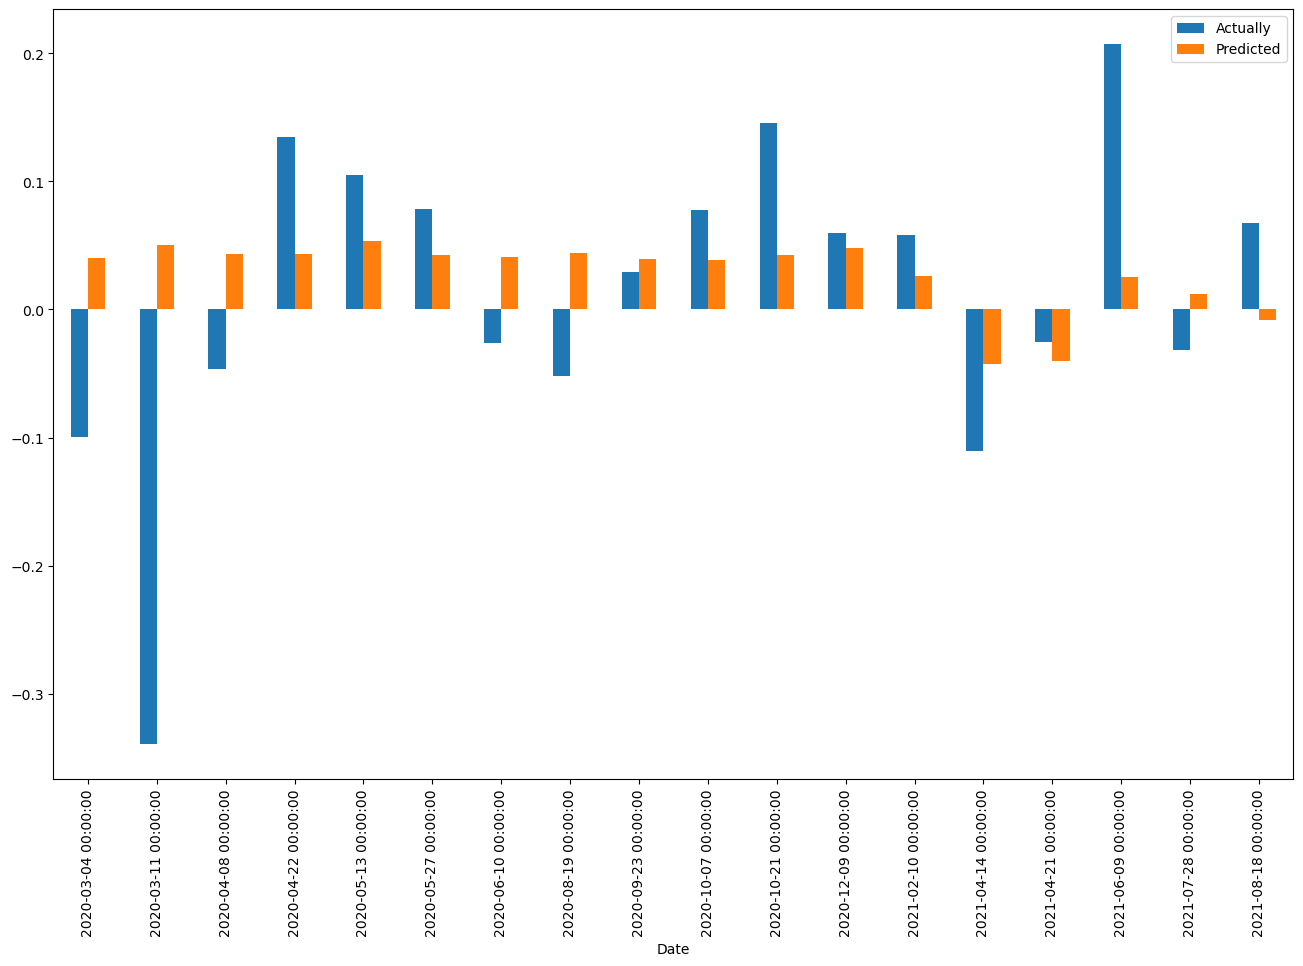

In [204]:
dfplot.plot(kind='bar',figsize=(16,10))
plt.show()

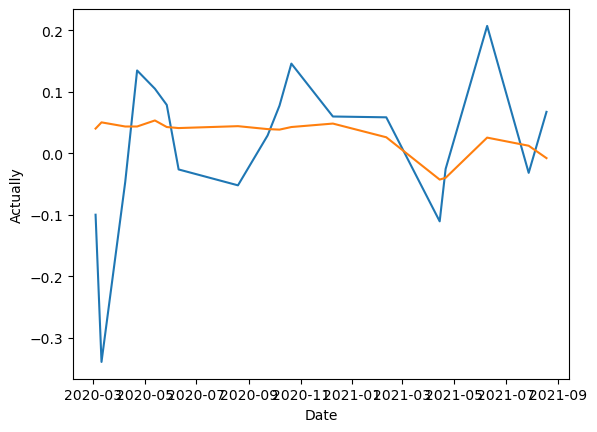

In [205]:
sns.lineplot(x='Date', y='Actually', data=dfplot)
sns.lineplot(x='Date', y='Predicted', data=dfplot)
plt.show()

# let try with dynamic date

In [206]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.suggestions(keyword='bitcoin')

[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Cryptocurrency'},
 {'mid': '/g/11fzz0b6bd',
  'title': 'The Bitcoin Standard: The Decentralized Alternative to Central Banking',
  'type': 'Book by Saifedean Ammous'},
 {'mid': '/g/11g24jzg8x',
  'title': 'Cryptocurrency Investing For Dummies',
  'type': 'Book by Kiana Danial'},
 {'mid': '/g/11fx8y_lzq',
  'title': 'Mastering Bitcoin: Programming the Open Blockchain',
  'type': 'Book by Andreas Antonopoulos'},
 {'mid': '/g/11h2fx5fh8',
  'title': 'Bitcoin: A Peer-to-Peer Electronic Cash System',
  'type': 'Book by Satoshi Nakamoto'}]

In [209]:
kw_list = ['bitcoin','binance','coinbase']
cat = 0
geo = ''
timeframe = '2020-01-01 2023-01-27'

,bitcoin,binance,coinbase
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
...,...,...,...
Western Sahara,0,0,0
Yemen,0,0,0
Zambia,0,0,0


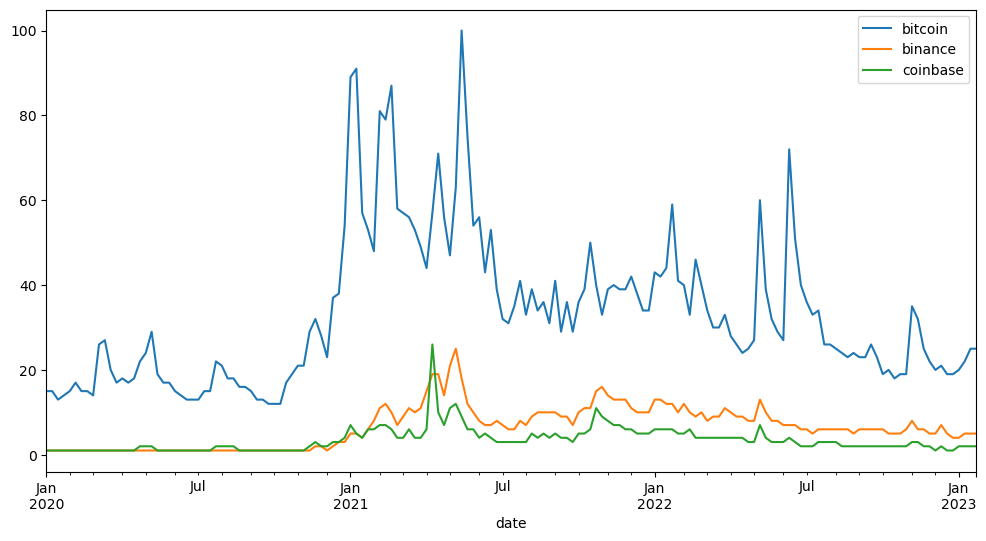

In [245]:
pytrends.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop='')
data = pytrends.interest_over_time()
%matplotlib inline

data.plot(figsize = (12,6))

app = pytrends.interest_by_region(resolution='COUNTRY')
app

In [246]:
data

,bitcoin,binance,coinbase,isPartial
date,,,,
2020-01-05,15,1,1,False
2020-01-12,15,1,1,False
2020-01-19,13,1,1,False
2020-01-26,14,1,1,False
2020-02-02,15,1,1,False
...,...,...,...,...
2022-12-25,19,4,1,False
2023-01-01,20,4,2,False
2023-01-08,22,5,2,False


In [213]:
price = yf.download('BTC-USD', start='2020-01-01', end='2023-01-27', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [214]:
price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,8178.215820,6914.996094,8163.692383,8163.692383,157692127789
2020-01-08,8161.935547,8879.511719,7726.774902,8827.764648,8827.764648,200182431836
2020-01-15,8825.343750,9164.362305,8544.520508,8745.894531,8745.894531,224863843189
2020-01-22,8744.210938,9358.589844,8266.840820,9358.589844,9358.589844,177639890997
2020-01-29,9357.470703,9553.125977,9112.811523,9180.962891,9180.962891,210079554352
...,...,...,...,...,...,...
2022-12-28,16716.400391,16768.169922,16408.474609,16679.857422,16679.857422,93891516899
2023-01-04,16680.205078,17484.720703,16667.763672,17446.292969,17446.292969,98444835704
2023-01-11,17446.359375,21438.660156,17337.994141,21161.519531,21161.519531,192627321780


In [226]:
df_price = price['Adj Close']
df_price

Date
2020-01-01     8163.692383
2020-01-08     8827.764648
2020-01-15     8745.894531
2020-01-22     9358.589844
2020-01-29     9180.962891
                  ...     
2022-12-28    16679.857422
2023-01-04    17446.292969
2023-01-11    21161.519531
2023-01-18    22636.468750
2023-01-25    23032.777344
Name: Adj Close, Length: 161, dtype: float64

In [227]:
df_price

Date
2020-01-01     8163.692383
2020-01-08     8827.764648
2020-01-15     8745.894531
2020-01-22     9358.589844
2020-01-29     9180.962891
                  ...     
2022-12-28    16679.857422
2023-01-04    17446.292969
2023-01-11    21161.519531
2023-01-18    22636.468750
2023-01-25    23032.777344
Name: Adj Close, Length: 161, dtype: float64

In [228]:
ret = df_price.pct_change()
ret
ret = ret[1:]

In [229]:
ret

Date
2020-01-08    0.081345
2020-01-15   -0.009274
2020-01-22    0.070055
2020-01-29   -0.018980
2020-02-05    0.111892
                ...   
2022-12-28   -0.002232
2023-01-04    0.045950
2023-01-11    0.212952
2023-01-18    0.069700
2023-01-25    0.017508
Name: Adj Close, Length: 160, dtype: float64

In [233]:
data

,bitcoin,binance,coinbase,isPartial
date,,,,
2020-01-05,15,1,1,False
2020-01-12,15,1,1,False
2020-01-19,13,1,1,False
2020-01-26,14,1,1,False
2020-02-02,15,1,1,False
...,...,...,...,...
2022-12-25,19,4,1,False
2023-01-01,20,4,2,False
2023-01-08,22,5,2,False


In [235]:
type(ret)

pandas.core.series.Series

In [257]:
ret

Date
2020-01-08    0.081345
2020-01-15   -0.009274
2020-01-22    0.070055
2020-01-29   -0.018980
2020-02-05    0.111892
                ...   
2022-12-28   -0.002232
2023-01-04    0.045950
2023-01-11    0.212952
2023-01-18    0.069700
2023-01-25    0.017508
Name: Adj Close, Length: 160, dtype: float64

In [254]:
data=data.reset_index()
data = data.rename(columns={'date': 'Date'})
data=data.set_index('Date')
data

,bitcoin,binance,coinbase,isPartial
Date,,,,
2020-01-05,15,1,1,False
2020-01-12,15,1,1,False
2020-01-19,13,1,1,False
2020-01-26,14,1,1,False
2020-02-02,15,1,1,False
...,...,...,...,...
2022-12-25,19,4,1,False
2023-01-01,20,4,2,False
2023-01-08,22,5,2,False


In [260]:
data=data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
ret.index = pd.to_datetime(ret.index)

In [262]:
print(data['Date'].min())
print(data['Date'].max())
print(ret.index.min())
print(ret.index.max())

2020-01-05 00:00:00
2023-01-22 00:00:00
2020-01-08 00:00:00
2023-01-25 00:00:00


In [268]:
data = data.resample('W-MON', on='Date').mean()
ret = ret.resample('W-MON').mean()

In [269]:
data

,bitcoin,binance,coinbase,isPartial
Date,,,,
2020-01-13,15.0,1.0,1.0,0.0
2020-01-20,13.0,1.0,1.0,0.0
2020-01-27,14.0,1.0,1.0,0.0
2020-02-03,15.0,1.0,1.0,0.0
2020-02-10,17.0,1.0,1.0,0.0
...,...,...,...,...
2022-12-26,19.0,4.0,1.0,0.0
2023-01-02,20.0,4.0,2.0,0.0
2023-01-09,22.0,5.0,2.0,0.0


In [270]:
ret

Date
2020-01-13    0.081345
2020-01-20   -0.009274
2020-01-27    0.070055
2020-02-03   -0.018980
2020-02-10    0.111892
                ...   
2023-01-02   -0.002232
2023-01-09    0.045950
2023-01-16    0.212952
2023-01-23    0.069700
2023-01-30    0.017508
Freq: W-MON, Name: Adj Close, Length: 160, dtype: float64

In [271]:
merged_df = pd.merge(data, ret, on='Date')


In [272]:
merged_df

,bitcoin,binance,coinbase,isPartial,Adj Close
Date,,,,,
2020-01-13,15.0,1.0,1.0,0.0,0.081345
2020-01-20,13.0,1.0,1.0,0.0,-0.009274
2020-01-27,14.0,1.0,1.0,0.0,0.070055
2020-02-03,15.0,1.0,1.0,0.0,-0.018980
2020-02-10,17.0,1.0,1.0,0.0,0.111892
...,...,...,...,...,...
2022-12-26,19.0,4.0,1.0,0.0,-0.011187
2023-01-02,20.0,4.0,2.0,0.0,-0.002232
2023-01-09,22.0,5.0,2.0,0.0,0.045950


In [405]:
X = merged_df.drop(columns = 'Adj Close')
y = merged_df['Adj Close']
X_train ,X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=12)

In [406]:
X_train

,bitcoin,binance,coinbase,isPartial
Date,,,,
2020-06-29,13.0,1.0,1.0,0.0
2021-05-24,75.0,12.0,6.0,0.0
2022-11-14,32.0,6.0,3.0,0.0
2022-07-25,26.0,6.0,3.0,0.0
2022-12-19,19.0,5.0,1.0,0.0
...,...,...,...,...
2020-02-03,15.0,1.0,1.0,0.0
2022-07-11,33.0,5.0,2.0,0.0
2022-08-08,25.0,6.0,3.0,0.0


In [407]:
model= LinearRegression()
reg = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  0.000310411707876157


In [408]:
y_pred

array([-0.00211816, -0.00300536,  0.03968692,  0.00066451,  0.0406952 ,
        0.03201568,  0.00863867,  0.01115056,  0.00254587,  0.00308744,
       -0.00022268,  0.01095462, -0.01045206,  0.03093254, -0.00183327,
       -0.00068941,  0.03907051,  0.03147411,  0.00567417,  0.00417057,
        0.03228646, -0.00801502, -0.02390261,  0.03228646,  0.03147411,
        0.03147411, -0.00196848,  0.03201568, -0.00882737, -0.001894  ,
       -0.02013988,  0.03093254])

In [409]:
m= model.coef_
b=model.intercept_

In [410]:
m

array([-0.00027078, -0.00725077,  0.01003344,  0.05990295])

In [411]:
b

0.03275317934292174

In [412]:
print('MAE = ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE =' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE=', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.06339990192918384
MSE = 0.006987199604003434
RMSE= 0.08358947065272894


In [413]:
df_report = pd.DataFrame({'Actually':y_test,'Predicted':y_pred})

In [414]:
df_report

,Actually,Predicted
Date,,
2021-09-20,-0.135878,-0.002118
2022-05-30,0.072051,-0.003005
2020-11-23,0.082858,0.039687
2021-10-04,0.255401,0.000665
2020-08-17,0.050892,0.040695
2020-06-22,0.009607,0.032016
2022-12-26,-0.011187,0.008639
2022-10-10,-0.063207,0.011151
2022-11-21,-0.041152,0.002546


In [415]:
dfplot=df_report.copy()

In [416]:
dfplot

,Actually,Predicted
Date,,
2021-09-20,-0.135878,-0.002118
2022-05-30,0.072051,-0.003005
2020-11-23,0.082858,0.039687
2021-10-04,0.255401,0.000665
2020-08-17,0.050892,0.040695
2020-06-22,0.009607,0.032016
2022-12-26,-0.011187,0.008639
2022-10-10,-0.063207,0.011151
2022-11-21,-0.041152,0.002546


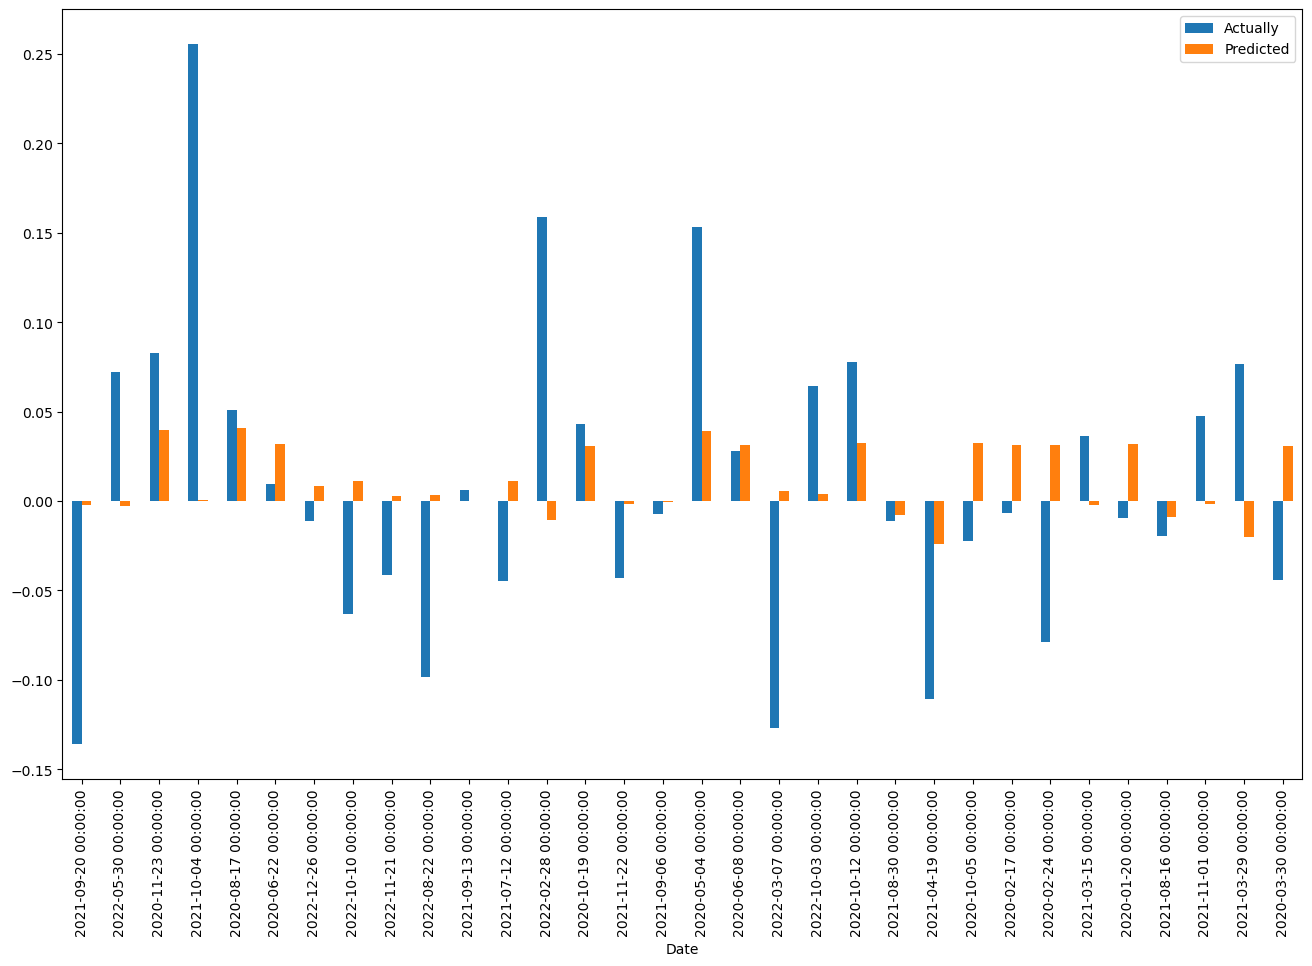

In [417]:
dfplot.plot(kind='bar',figsize=(16,10))
plt.show()

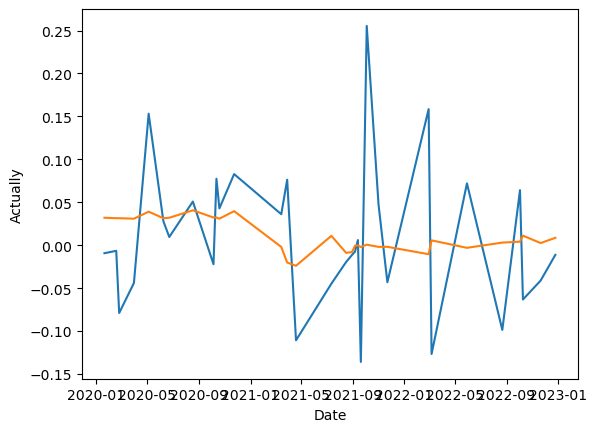

In [418]:
sns.lineplot(x='Date', y='Actually', data=dfplot)
sns.lineplot(x='Date', y='Predicted', data=dfplot)
plt.show()

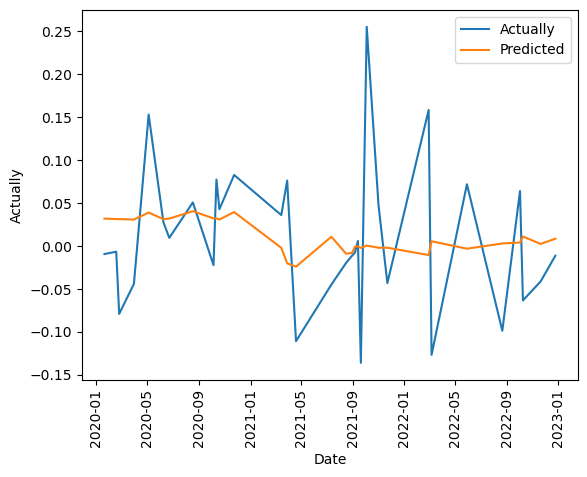

In [419]:
sns.lineplot(data=dfplot, x="Date", y="Actually", label="Actually")
sns.lineplot(data=dfplot, x="Date", y="Predicted", label="Predicted")
plt.xticks(rotation=90)
plt.show()

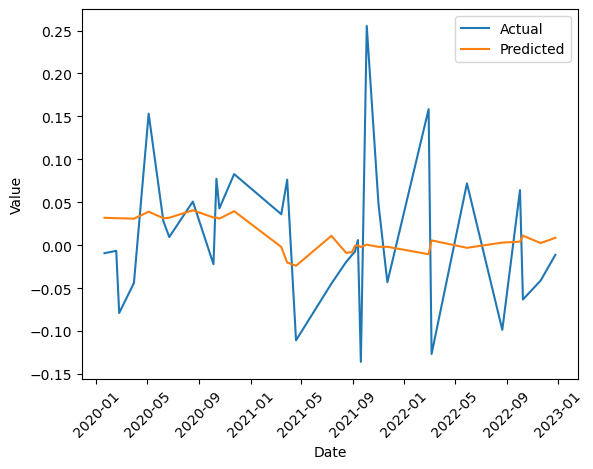

In [420]:
# plot the actual and predicted values
sns.lineplot(x='Date', y='Actually', data=dfplot)
sns.lineplot(x='Date', y='Predicted', data=dfplot)

# set the labels for the x and y-axes
plt.xlabel('Date')
plt.ylabel('Value')

# add a legend
plt.legend(['Actual', 'Predicted'])
plt.xticks(rotation=45)

# show the plot
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Actually'>

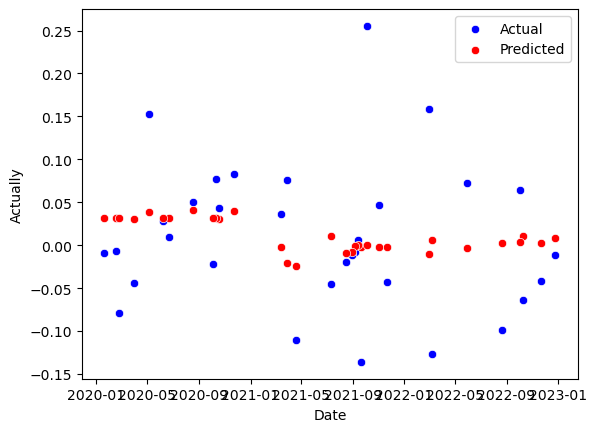

In [421]:
sns.scatterplot(x="Date", y="Actually", data=dfplot, color="b", label="Actual")
sns.scatterplot(x="Date", y="Predicted", data=dfplot, color="r", label="Predicted")

In [422]:
dfplot

,Actually,Predicted
Date,,
2021-09-20,-0.135878,-0.002118
2022-05-30,0.072051,-0.003005
2020-11-23,0.082858,0.039687
2021-10-04,0.255401,0.000665
2020-08-17,0.050892,0.040695
2020-06-22,0.009607,0.032016
2022-12-26,-0.011187,0.008639
2022-10-10,-0.063207,0.011151
2022-11-21,-0.041152,0.002546


In [423]:
dfplotx

,Date,Actually,Predicted,timestamp
0,2020-01-20,-0.009274,0.032016,1579478400000000000
1,2020-02-17,-0.006489,0.031474,1581897600000000000
2,2020-02-24,-0.078909,0.031474,1582502400000000000
3,2020-03-30,-0.043974,0.030933,1585526400000000000
4,2020-05-04,0.153196,0.039071,1588550400000000000
5,2020-06-08,0.027902,0.031474,1591574400000000000
6,2020-06-22,0.009607,0.032016,1592784000000000000
7,2020-08-17,0.050892,0.040695,1597622400000000000
8,2020-10-05,-0.022152,0.032286,1601856000000000000
9,2020-10-12,0.077467,0.032286,1602460800000000000


<AxesSubplot:xlabel='Date', ylabel='Actually'>

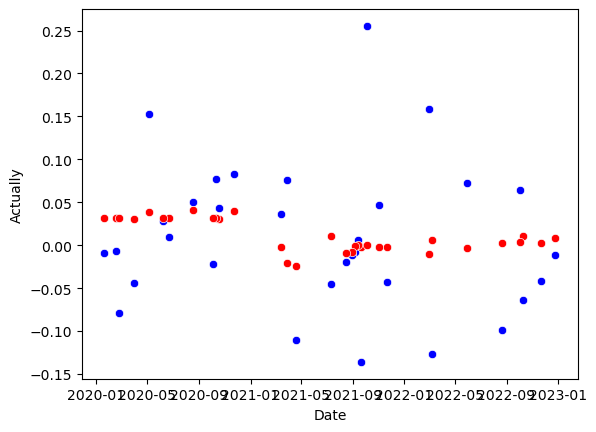

In [424]:
dfplotx=dfplot.reset_index()
dfplotx['Date'] = pd.to_datetime(dfplotx['Date'])



sns.scatterplot(x='Date', y='Actually', data=dfplot,color='blue')
sns.scatterplot(x='Date', y='Predicted', data=dfplot,color='red')



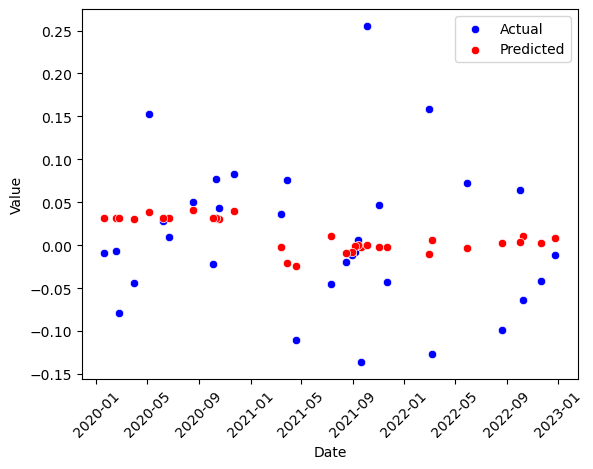

In [425]:
sns.scatterplot(x="Date", y="Actually", data=dfplot, color="b", label="Actual")
sns.scatterplot(x="Date", y="Predicted", data=dfplot, color="r", label="Predicted")

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

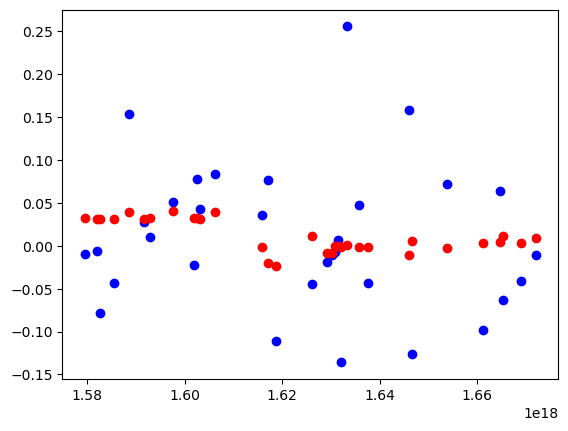

In [426]:
dfplotx['Date'] = pd.to_datetime(dfplotx['Date'])
dfplotx['timestamp'] = dfplotx['Date'].values.astype(np.int64)
plt.scatter(dfplotx['timestamp'], dfplotx['Actually'], color='blue')
plt.scatter(dfplotx['timestamp'], dfplotx['Predicted'], color='red')
plt.show()

In [427]:
dfplotx

,Date,Actually,Predicted,timestamp
0,2021-09-20,-0.135878,-0.002118,1632096000000000000
1,2022-05-30,0.072051,-0.003005,1653868800000000000
2,2020-11-23,0.082858,0.039687,1606089600000000000
3,2021-10-04,0.255401,0.000665,1633305600000000000
4,2020-08-17,0.050892,0.040695,1597622400000000000
5,2020-06-22,0.009607,0.032016,1592784000000000000
6,2022-12-26,-0.011187,0.008639,1672012800000000000
7,2022-10-10,-0.063207,0.011151,1665360000000000000
8,2022-11-21,-0.041152,0.002546,1668988800000000000
9,2022-08-22,-0.098613,0.003087,1661126400000000000


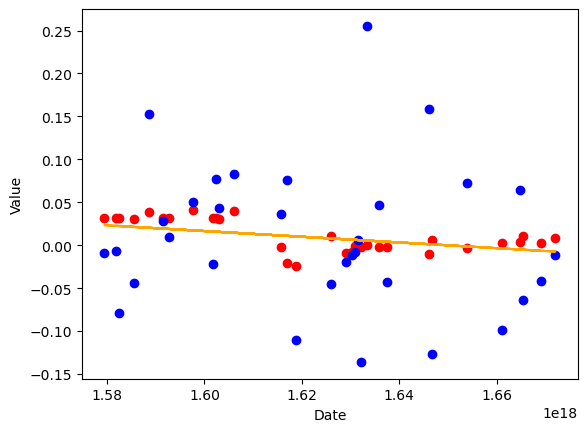

In [428]:
dfplotx['timestamp'] = dfplotx['Date'].values.astype(np.int64)

x = dfplotx['timestamp'].values.reshape(-1,1)
y = dfplotx['Actually'].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(dfplotx['timestamp'], dfplotx['Predicted'], color='red')

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


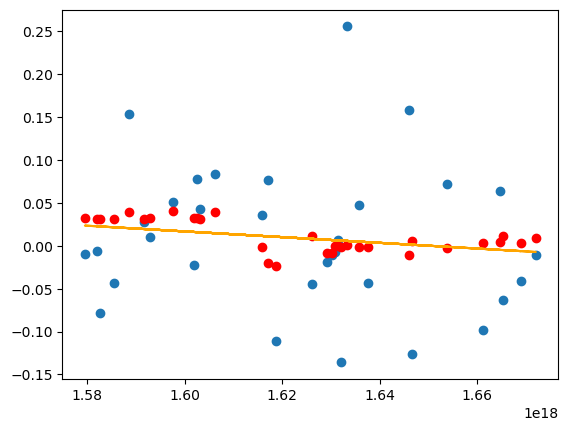

In [429]:
slope, y_intercept = np.polyfit(dfplotx['timestamp'], dfplotx['Actually'], 1)
plt.scatter(dfplotx['timestamp'], dfplotx['Actually'])
plt.scatter(dfplotx['timestamp'], dfplotx['Predicted'], color='red')

# Plot the regression line
plt.plot(dfplotx['timestamp'], slope*dfplotx['timestamp'] + y_intercept,color='orange')

# Show the plot
plt.show()

In [430]:
dfplotx

,Date,Actually,Predicted,timestamp
0,2021-09-20,-0.135878,-0.002118,1632096000000000000
1,2022-05-30,0.072051,-0.003005,1653868800000000000
2,2020-11-23,0.082858,0.039687,1606089600000000000
3,2021-10-04,0.255401,0.000665,1633305600000000000
4,2020-08-17,0.050892,0.040695,1597622400000000000
5,2020-06-22,0.009607,0.032016,1592784000000000000
6,2022-12-26,-0.011187,0.008639,1672012800000000000
7,2022-10-10,-0.063207,0.011151,1665360000000000000
8,2022-11-21,-0.041152,0.002546,1668988800000000000
9,2022-08-22,-0.098613,0.003087,1661126400000000000


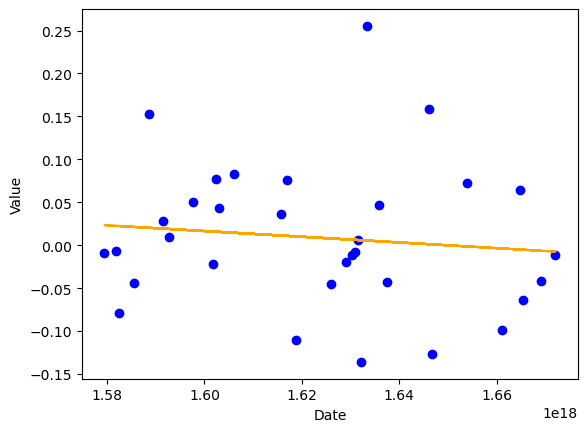

In [431]:

plt.scatter(dfplotx['timestamp'], dfplotx['Actually'], color='blue')
plt.plot(x, model.predict(x), color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [432]:
dfplotx

,Date,Actually,Predicted,timestamp
0,2021-09-20,-0.135878,-0.002118,1632096000000000000
1,2022-05-30,0.072051,-0.003005,1653868800000000000
2,2020-11-23,0.082858,0.039687,1606089600000000000
3,2021-10-04,0.255401,0.000665,1633305600000000000
4,2020-08-17,0.050892,0.040695,1597622400000000000
5,2020-06-22,0.009607,0.032016,1592784000000000000
6,2022-12-26,-0.011187,0.008639,1672012800000000000
7,2022-10-10,-0.063207,0.011151,1665360000000000000
8,2022-11-21,-0.041152,0.002546,1668988800000000000
9,2022-08-22,-0.098613,0.003087,1661126400000000000


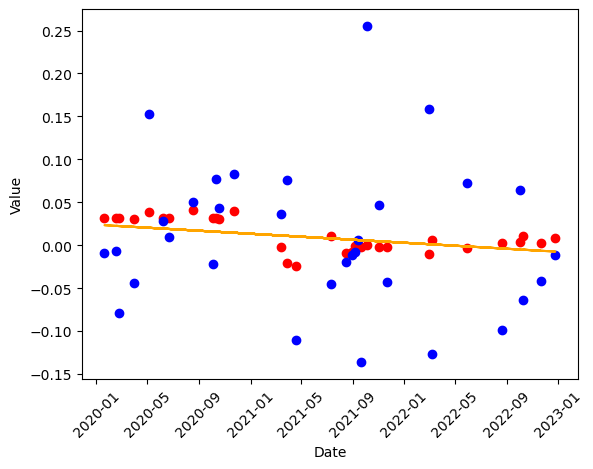

In [433]:
# scatter plot example
plt.scatter(dfplotx['Date'], dfplotx['Predicted'], color='red')
plt.scatter(dfplotx['Date'], dfplotx['Actually'], color='blue')
plt.plot(dfplotx['Date'], y_pred, color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.show()

In [436]:
y_pred

array([[ 0.00586789],
       [-0.00136727],
       [ 0.01450988],
       [ 0.00546593],
       [ 0.01732355],
       [ 0.01893136],
       [-0.00739657],
       [-0.00518583],
       [-0.00639169],
       [-0.00377899],
       [ 0.00606886],
       [ 0.00787765],
       [ 0.00124542],
       [ 0.01551476],
       [ 0.0040591 ],
       [ 0.00626984],
       [ 0.0203382 ],
       [ 0.01933332],
       [ 0.00104445],
       [-0.00498485],
       [ 0.01571574],
       [ 0.00647082],
       [ 0.01028937],
       [ 0.01591671],
       [ 0.02254894],
       [ 0.02234796],
       [ 0.01129425],
       [ 0.02335285],
       [ 0.00687277],
       [ 0.00466203],
       [ 0.0108923 ],
       [ 0.02134308]])

In [440]:
y_predx = y_pred.reshape(-1)
# must resahpe to array 1 dimension to plot

# The .reshape(-1) function is used to flatten the array into a 1-dimensional array. This should allow you to use the y_pred array as the input for a plotting function like matplotlib's plot() or scatter() function.
It's important to keep in mind that, if you are going to use this array for further calculations, you should reshape it back to its original shape, since reshape(-1) can change the shape and affect the further calculations.

In [441]:
y_predx

array([ 0.00586789, -0.00136727,  0.01450988,  0.00546593,  0.01732355,
        0.01893136, -0.00739657, -0.00518583, -0.00639169, -0.00377899,
        0.00606886,  0.00787765,  0.00124542,  0.01551476,  0.0040591 ,
        0.00626984,  0.0203382 ,  0.01933332,  0.00104445, -0.00498485,
        0.01571574,  0.00647082,  0.01028937,  0.01591671,  0.02254894,
        0.02234796,  0.01129425,  0.02335285,  0.00687277,  0.00466203,
        0.0108923 ,  0.02134308])

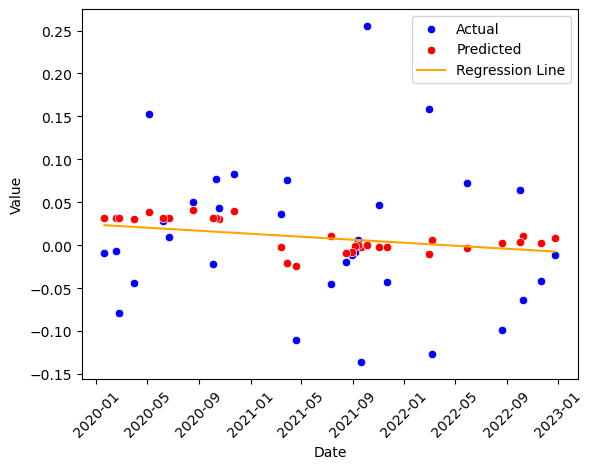

In [439]:
# seaborn example
sns.scatterplot(x=dfplotx['Date'], y=dfplotx['Actually'], color="b", label="Actual")
sns.scatterplot(x=dfplotx['Date'], y=dfplotx['Predicted'], color="r", label="Predicted")
sns.lineplot(x=dfplotx['Date'], y=y_predx, color='orange', label="Regression Line")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [448]:

# Download BTC-USD price data
price = yf.download('BTC-USD', start='2020-01-01', end='2023-01-27', interval='1wk')

# Connect to the Google Trends API
pytrends = TrendReq(hl='en-US', tz=360)

# Build the payload for the 'bitcoin' keyword
kw_list = ['bitcoin']
cat = 0
geo = ''
timeframe = '2020-01-01 2023-01-27'
pytrends.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop='')

# Get the interest over time data
datax = pytrends.interest_over_time()



[*********************100%***********************]  1 of 1 completed


In [450]:
datax.drop()

,bitcoin,isPartial
date,,
2020-01-05,15,False
2020-01-12,15,False
2020-01-19,13,False
2020-01-26,14,False
2020-02-02,15,False
...,...,...
2022-12-25,19,False
2023-01-01,20,False
2023-01-08,22,False


In [451]:
datax = datax.drop('isPartial', axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


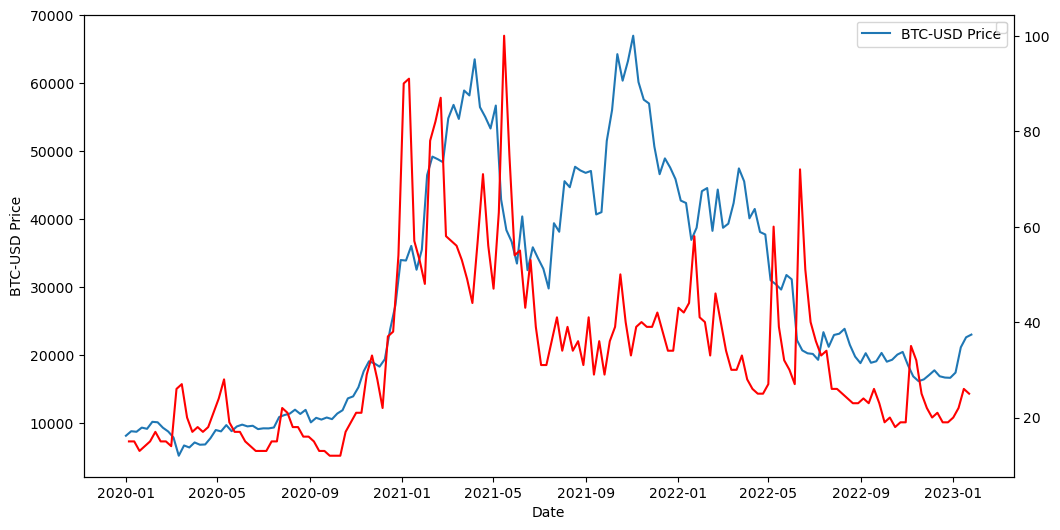

In [465]:
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.plot(price['Close'], label='BTC-USD')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC-USD Price')
ax1.legend(loc = 'upper left')
ax1.legend(labels=['BTC-USD Price'])

ax2 = ax1.twinx()
ax2.plot(datax, 'r', label='Google Trends')
ax2.set_ylabel('Google Trends')
ax1.legend(labels=['BTC-USD Price'])
ax2.legend(labels=['Google Trends'])
plt.legend()
plt.show()

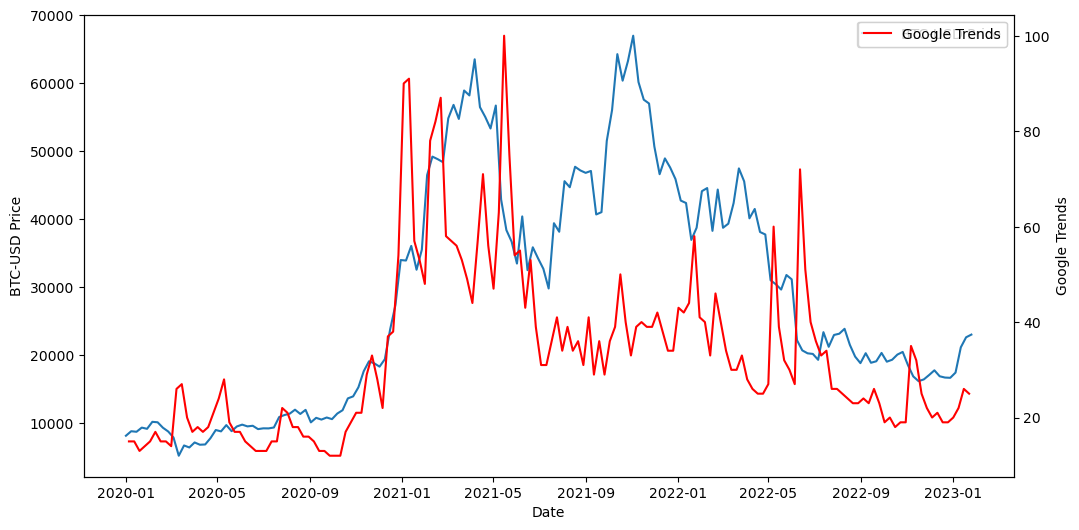

In [471]:
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.plot(price['Close'], label='BTC-USD')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC-USD Price')
ax1.legend(loc = 'upper left')
ax1.legend(labels=['BTC-USD Price'])

ax2 = ax1.twinx()
ax2.plot(datax, 'r', label='Google Trends')
ax2.set_ylabel('Google Trends')
ax1.legend(labels=['BTC-USD Price'])
ax2.legend(labels=['Google Trends'])
plt.legend()
plt.show()

In [ ]:
# try to find google trend with axie